# Multiple Linear Regression

## A model to predict the uniaxial compressive strength (UCS) of rocks from their mineral and geometric properties

This was a continuous assessment requirement for my final module. The task was to select a dataset and perform multiple linear regression analysis using R. 

The data was taken from [here.](http://users.stat.ufl.edu/~winner/datasets.html)

As well as the dependent variable **UCS**, 8 potential predictor variables are available:

4 mineral properties: %Quartz (**quartz**), %Plagaoclase (**plag**), %K.feldspar (**kfds**), %Hornblende (**hb**) and

4 geometric properties: Grain size (mm) (**gs**), Grain area (mm^2) (**ga**), Aspect Ratio (**ar**) and Shape Factor (**sf**) 


## Load and Activate R

The first step was to load and activate the IRKernel which I did following [this tutorial.](https://www.datacamp.com/community/blog/jupyter-notebook-r#gs.z0gxLNc)

## Import the data and start exploring

In [98]:
#import the data and take a look
link <- 'http://users.stat.ufl.edu/~winner/data/rockstrength.csv'
rocks <- read.csv(link)
head(rocks)

sample_id,UCS,quartz,plag,kfds,hb,gs,ga,sf,ar
1,100.6,40.3,9.98,17.01,21.57,0.031,754.4,0.594,0.630
2,112.0,47.1,8.50,15.00,23.00,0.025,490.6,0.612,0.612
3,117.5,45.4,9.10,16.20,24.00,0.022,379.9,0.628,0.628
4,100.9,41.3,7.72,11.02,18.86,0.044,1519.8,0.571,0.667
5,94.5,33.8,4.10,14.00,16.00,0.043,1451.5,0.575,0.662
6,91.5,37.2,7.40,12.00,13.00,0.046,1661.1,0.499,0.663


I'm going to get rid of the id column straight away as it is not necessary in R 

In [99]:
rocks <- rocks[2:10] 

Check the data types (which are probably all numerical, but need to make sure)

In [100]:
str(rocks)

'data.frame':	30 obs. of  9 variables:
 $ UCS   : num  100.6 112 117.5 100.9 94.5 ...
 $ quartz: num  40.3 47.1 45.4 41.3 33.8 37.2 40 39.1 44.2 35.1 ...
 $ plag  : num  9.98 8.5 9.1 7.72 4.1 7.4 5.44 5.1 5 5.51 ...
 $ kfds  : num  17 15 16.2 11 14 ...
 $ hb    : num  21.6 23 24 18.9 16 ...
 $ gs    : num  0.031 0.025 0.022 0.044 0.043 0.046 0.035 0.032 0.032 0.056 ...
 $ ga    : num  754 491 380 1520 1452 ...
 $ sf    : num  0.594 0.612 0.628 0.571 0.575 0.499 0.606 0.585 0.615 0.572 ...
 $ ar    : num  0.63 0.612 0.628 0.667 0.662 0.663 0.685 0.683 0.68 0.639 ...


All numerical, but very different scales...

Next up - the dependent variable **UCS**. Is it normally distributed?


	Shapiro-Wilk normality test

data:  rocks$UCS
W = 0.96383, p-value = 0.3865


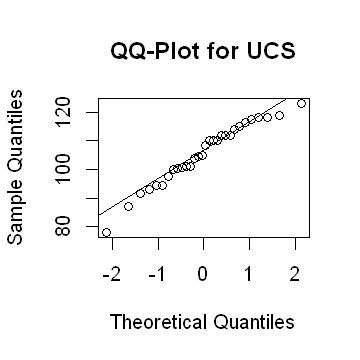

In [101]:
library(repr)
#create QQ-plot
options(repr.plot.width=3, repr.plot.height=3) #recale the plot to a reasonable size
qqnorm(rocks$UCS, main = 'QQ-Plot for UCS')
qqline(rocks$UCS)
#Shapiro Wilk test for normality
shapiro.test(rocks$UCS)

Since the QQ-plot is roughly a straight and the p-value from the Shapiro-Wilk test is > 0.05, there is no reason to query the assumption of a normally distributed dependent variable. 

The plot produced by the notebook was really big though, so I rescaled using the 'repr' package

Next I want to check the relationships between the dependent variable and the predictors and also the relationships between the predictors. 

In [102]:
cor(rocks)

,UCS,quartz,plag,kfds,hb,gs,ga,sf,ar
UCS,1.0000000,0.5195585,0.32325270,0.26713240,0.6935996,-0.8535317,-0.85372147,0.74538704,-0.13062614
quartz,0.5195585,1.0000000,0.36705123,-0.13824760,0.1819355,-0.3401121,-0.40473186,0.21712915,-0.17961144
plag,0.3232527,0.3670512,1.00000000,0.02991282,0.1442950,-0.1297172,-0.17070271,0.25010445,-0.64964150
kfds,0.2671324,-0.1382476,0.02991282,1.00000000,0.6276819,-0.4542640,-0.40736454,0.09318555,-0.32693655
hb,0.6935996,0.1819355,0.14429504,0.62768189,1.0000000,-0.7200409,-0.66416976,0.50528929,-0.22915931
gs,-0.8535317,-0.3401121,-0.12971719,-0.45426399,-0.7200409,1.0000000,0.98452402,-0.66769947,0.08985670
ga,-0.8537215,-0.4047319,-0.17070271,-0.40736454,-0.6641698,0.9845240,1.00000000,-0.64752309,0.09327277
sf,0.7453870,0.2171291,0.25010445,0.09318555,0.5052893,-0.6676995,-0.64752309,1.00000000,-0.09531308
ar,-0.1306261,-0.1796114,-0.64964150,-0.32693655,-0.2291593,0.0898567,0.09327277,-0.09531308,1.00000000


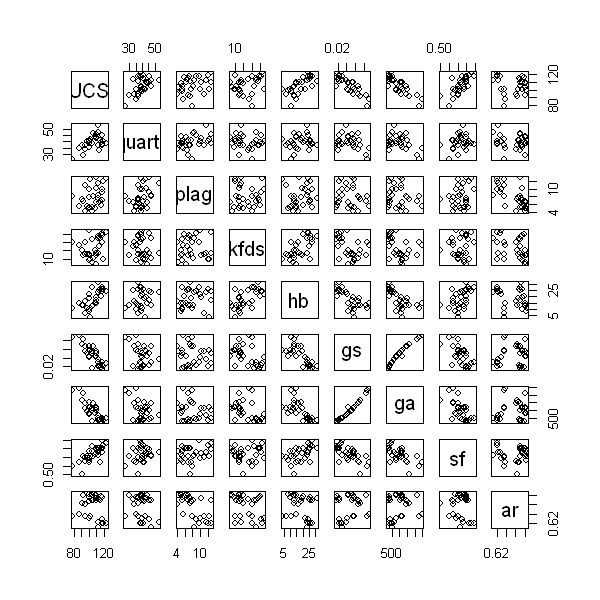

In [103]:
options(repr.plot.width=5, repr.plot.height=5)
pairs(rocks)

The most striking observation is that two of the variables **gs** and **ga** are very highly correlated with each other (cor > 0.98). 

**gs** is grain size and **ga** is grain area. Since they are closely related attributes and so highly correlated, I am just going to get rid of one of them  -  **ga**. 

In [104]:
rocks <- rocks[-7]

And re-run the pairs() function to take another look

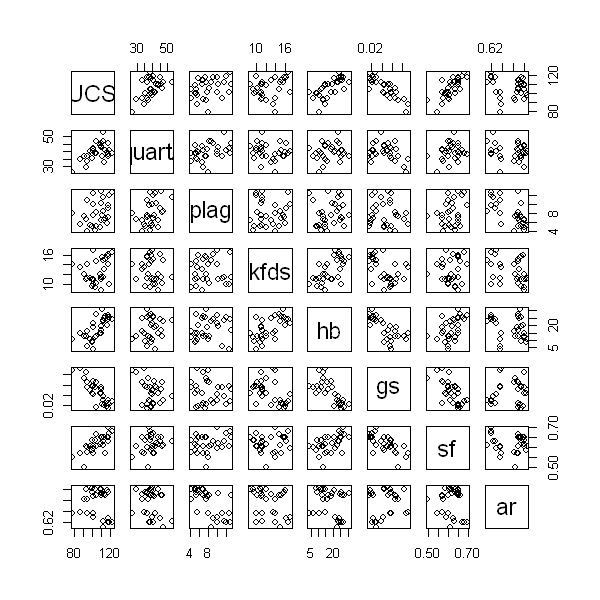

In [105]:
options(repr.plot.width=5, repr.plot.height=5)
pairs(rocks)

Lots of promising correlation between **UCS** and the predictors, particularly **quartz**, **hb**, **gs** and **sf**. But also lots of correlation between the predictors themselves, which means PCA is a good next step.

## PCA

In [106]:
rocks_scaled <- as.data.frame(scale(rocks[2:8])) #normalize so all predictor variables are on the same scale
rocks.pca <- prcomp(rocks_scaled) # run pca
summary(rocks.pca) #ouptut from pca

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.6949 1.2490 1.1135 0.81721 0.51671 0.48686 0.39445
Proportion of Variance 0.4104 0.2229 0.1771 0.09541 0.03814 0.03386 0.02223
Cumulative Proportion  0.4104 0.6332 0.8104 0.90577 0.94391 0.97777 1.00000

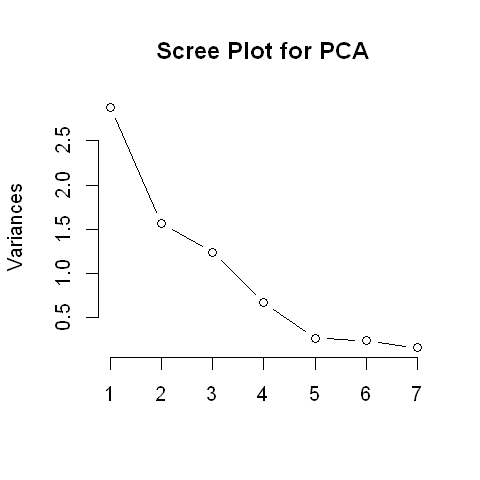

In [107]:
#Produce a scree plot
options(repr.plot.width=4, repr.plot.height=4)
screeplot(rocks.pca, type="lines", main = 'Scree Plot for PCA')

From the PCA output, the first 3 components account for over 80% of the variation in the dataset and each account for the 
variance of > 1 variable (scree plot) so I will add them to the rocks data frame and attempt some models.

With PCA, it's a good idea to understand which variables are contributing to each PCA element and to what extend using a biplot.

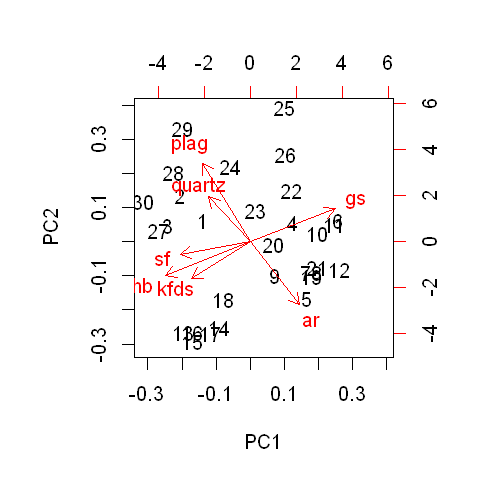

In [108]:
options(repr.plot.width=4, repr.plot.height=4)
biplot(rocks.pca)

The biplot only tells us about **PC1** and **PC2** (ie not **PC3**).
A high **PC1** score can be interpreted as a high **gs** value and a low **sf**, **hb** and **kfds** score and vice versa.
A high **PC2** is associated with a high **plag** and **quartz** and a low **ar**. 

Reviewing this information relative to the correlation matrix above, it suggests **PC2** may not be great for predicting **UCS** since **plag** and **ar** are not strongly correlated with **UCS**.



In [109]:
cor(rocks[c("UCS", "quartz", "ar", "plag")])

,UCS,quartz,ar,plag
UCS,1.0000000,0.5195585,-0.1306261,0.3232527
quartz,0.5195585,1.0000000,-0.1796114,0.3670512
ar,-0.1306261,-0.1796114,1.0000000,-0.6496415
plag,0.3232527,0.3670512,-0.6496415,1.0000000


In [110]:
#add PC1, 2 and 3 to the data.frame
rocks_with_PCA <- data.frame(rocks, rocks.pca$x[,1:3])

# Building Models

First, just try the 3 PCA variables

In [111]:
#just try everything model
model <- lm(UCS ~ PC1 + PC2 + PC3, data = rocks_with_PCA)
summary(model)


Call:
lm(formula = UCS ~ PC1 + PC2 + PC3, data = rocks_with_PCA)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.452  -2.195   0.995   2.071   6.960 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 105.5767     0.7475 141.231  < 2e-16 ***
PC1          -5.2851     0.4486 -11.781 6.30e-12 ***
PC2          -0.7350     0.6087  -1.207    0.238    
PC3           3.8201     0.6828   5.594 7.05e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.094 on 26 degrees of freedom
Multiple R-squared:  0.8684,	Adjusted R-squared:  0.8532 
F-statistic: 57.18 on 3 and 26 DF,  p-value: 1.394e-11


Unsurprisingly, the coefficient for **PC2** is not statistically significant, so I'm going to remove it and re-run the model with just **PC1** and **PC3**

In [112]:
model <- lm(UCS ~ PC1 + PC3, data = rocks_with_PCA)
summary(model)


Call:
lm(formula = UCS ~ PC1 + PC3, data = rocks_with_PCA)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9867  -2.6093   0.7471   2.1251   7.5822 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 105.5767     0.7539 140.049  < 2e-16 ***
PC1          -5.2851     0.4524 -11.683 4.57e-12 ***
PC3           3.8201     0.6886   5.548 7.02e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.129 on 27 degrees of freedom
Multiple R-squared:  0.861,	Adjusted R-squared:  0.8507 
F-statistic: 83.63 on 2 and 27 DF,  p-value: 2.694e-12


Using just **PC1** and **PC3** gives a decent model that accounts for 85% of the variation. 
Definitely worth checking out the diagnostic plots and cross-validating.


### Diagnostic Plots for PC1 + PC3 model

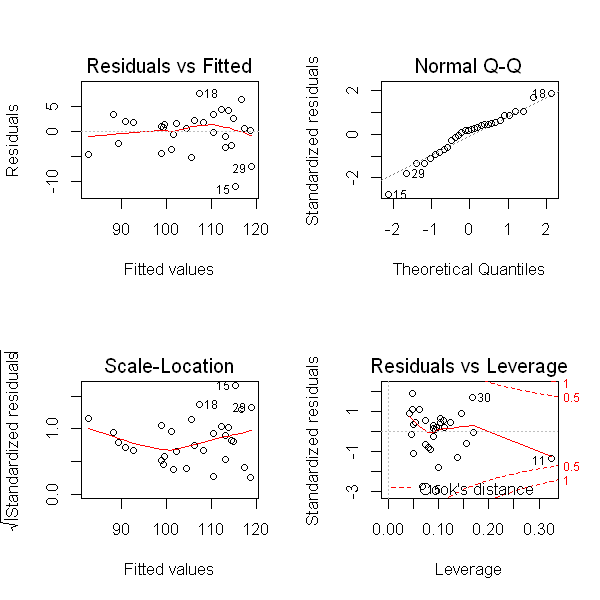

In [113]:
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow = c(2,2))
plot(model)

Not too bad but two things strike me (i) Observation 11 has a relatively high Cook's distance compared to the other points and approaching 0.5
(ii) Observation 15 is out of trend, not massively but worth checking out it's effect on the model

### Cross validation for model PC1 + PC3

Since there are only 30 observations, I'm going to try the 'leave one out' approach to cross validation
and calculate the RMSD (root mean squared deviation) from the output.

**Note:** I came across a bug in the DAAG package for the cv.lm function when both *printit* and *plotit* are set to false. I found [a fix](https://stackoverflow.com/questions/40700867/cvlm-daag-setting-printit-false-causes-an-issue-object-sumss-not-found) but to get the following code to work you may need to either (i) force an update of the DAAG package or (ii) set either *printit* or *plotit* to TRUE in the *cv.lm* code

In [114]:
library(lattice)
library(DAAG)
LOOcv_PC1_PC3= cv.lm(rocks_with_PCA, model, m =30, printit = FALSE, plotit = FALSE)
RMSD_PC1_PC3<-sqrt(mean((LOOcv_PC1_PC3$cvpred-LOOcv_PC1_PC3$UCS)^2))
print (paste("RMSD is",round(RMSD_PC1_PC3, 4)))

[1] "RMSD is 4.3739"


To assess the influence/impact of Observations (Obs) 11 and 15 on the model, I am going to re-run it with (i) just Obs 11 removed (ii) just Obs 15 removed and (iii) both Obs 11 and 15 removed. Since this is very repetitive, I have commented out code for the model summaries and diagnostic plots. If you would like to examine the output, just remove the #. 

Since I'm going to repeat the RMSD calculation a few times, I'm going to put it into a function

In [115]:
func_RMSD <- function(cv_output){
   rmsd <- sqrt(mean((cv_output$cvpred - cv_output$UCS)^2)) #hardwired with UCS as function is only for use in this notebook
    return (rmsd)
}

#### Obs 11 removed

In [116]:
model_no11 <- lm(UCS ~ PC1 + PC3, data = rocks_with_PCA[-11,])
#summary(model_no11)
#par(mfrow = c(2,2))
#plot(model_no11)
LOOcv_PC1_PC3_no11 <- cv.lm(rocks_with_PCA[-11,] , model_no11, m =29, printit = FALSE, plotit = FALSE)
RMSD_no11 <- func_RMSD(LOOcv_PC1_PC3_no11)



#### Obs 15 removed

In [117]:
model_no15 <- lm(UCS ~ PC1 + PC3, data = rocks_with_PCA[-15,])
#summary(model_no15)
#par(mfrow = c(2,2))
#plot(model_no15)
LOOcv_PC1_PC3_no15 <- cv.lm(rocks_with_PCA[-15,] , model_no15, m =29, printit = FALSE, plotit = FALSE)
RMSD_no15 <- func_RMSD(LOOcv_PC1_PC3_no15)

#### Obs 11 and 15 removed

In [118]:
model_no11_no15 <- lm(UCS ~ PC1 + PC3, data = rocks_with_PCA[-c(11, 15),])
#summary(model_no11_no15)
#par(mfrow = c(2,2))
#plot(model_no11_no15)
LOOcv_PC1_PC3_no11_no15 <- cv.lm(rocks_with_PCA[-c(11, 15),], model_no11, m =28, printit = FALSE, plotit = FALSE)
RMSD_no11_no15 <- func_RMSD(LOOcv_PC1_PC3_no11_no15)



To allow for easy comparison between models, I'll create a data frame with some of the critical parameters and plot the predicted versus actual for each one

In [119]:
#make a data frame summarizing Adj R2, RSE and RMSD to compare the 4 models
adj_r2 <- c(summary(model)$r.squared, summary(model_no15)$r.squared,summary(model_no11)$r.squared,
            summary(model_no11_no15)$r.squared)
RSE <- c(summary(model)$sigma, summary(model_no15)$sigma,summary(model_no11)$sigma,summary(model_no11_no15)$sigma)
RMSD_all <- c(RMSD_PC1_PC3, RMSD_no15, RMSD_no11, RMSD_no11_no15)
model_comparison <- data.frame(adj_r2, RSE, RMSD_all)
row.names(model_comparison) <- c("PC1 +PC3", "PC1 +PC3 no 15", "PC1 +PC3 no 11", "PC1 +PC3 no 11 and 15")

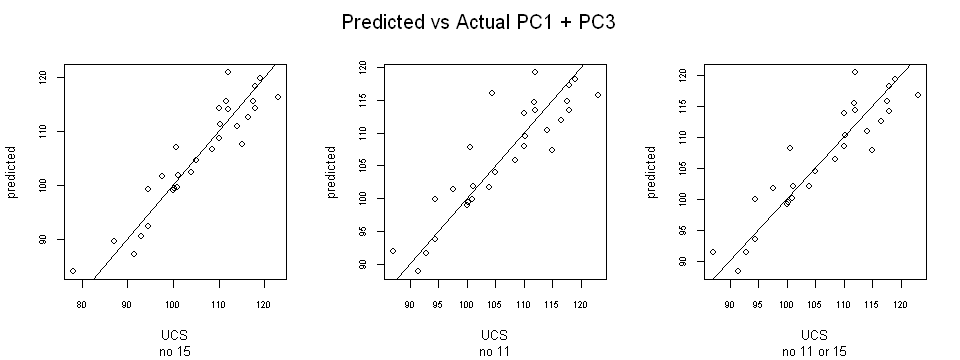

In [120]:
#plot the predicted versus the actual observations for the 'pca no 15' model
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow = c(1,3))
plot(rocks_with_PCA[-c(15),]$UCS, LOOcv_PC1_PC3_no15$cvpred, xlab = 'UCS', ylab = 'predicted', 
    sub = 'no 15', cex.lab = 1, cex.axis = 0.7)
abline(a = 0, b= 1) # add reference line for predicted = actual
mtext("Predicted vs Actual PC1 + PC3", outer = TRUE, line = -2)
plot(rocks_with_PCA[-c(11),]$UCS, LOOcv_PC1_PC3_no11$cvpred, xlab = 'UCS', ylab = 'predicted', 
     sub = 'no 11', cex.lab = 1, cex.axis = 0.7)
abline(a = 0, b= 1) # add reference line for predicted = actual
plot(rocks_with_PCA[-c(11, 15),]$UCS, LOOcv_PC1_PC3_no11_no15$cvpred, xlab = 'UCS', ylab = 'predicted', 
     sub = 'no 11 or 15',  cex.lab = 1, cex.axis = 0.7)
abline(a = 0, b= 1) # add reference line for predicted = actual

In [121]:
model_comparison

,adj_r2,RSE,RMSD_all
PC1 +PC3,0.8610089,4.129046,4.373895
PC1 +PC3 no 15,0.9000749,3.567057,3.822380
PC1 +PC3 no 11,0.8299470,4.063995,4.273776
PC1 +PC3 no 11 and 15,0.8784934,3.500347,3.732669


Removing Obs 15 reduces the RSE and RMSD significantly. Removing both Obs 11 and Obs 15 further reduce these parameters but causes a corresponding decrease in the adjusted R2. 

Removing observations from such a small dataset should only be done with very good reason. In a real-life situation, this decision would be made in consultation with the subject matter experts and after investigating possible explanations.


## Models without PCA

A couple of the variables correlate very well with the dependent variable **UCS**. I am wondering if maybe a simple model with 1 or 2 of the variables might compare favourably with the model built using **PC1** + **PC3**. Such a model would have the advantage of being very straight forward and understandable so some compromise on performance might be acceptable....


Using a function called *regsubsets* in the leaps package, I can quickly find out what subsets will give me the best models...

In [122]:
#Best Subset with max 3 variables (no point going higher, too much correlation)
library(leaps)
best_subset <- regsubsets(UCS~., data = rocks, nvmax = 3)
summary(best_subset)

Subset selection object
Call: regsubsets.formula(UCS ~ ., data = rocks, nvmax = 3)
7 Variables  (and intercept)
       Forced in Forced out
quartz     FALSE      FALSE
plag       FALSE      FALSE
kfds       FALSE      FALSE
hb         FALSE      FALSE
gs         FALSE      FALSE
sf         FALSE      FALSE
ar         FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: exhaustive
         quartz plag kfds hb  gs  sf  ar 
1  ( 1 ) " "    " "  " "  " " "*" " " " "
2  ( 1 ) "*"    " "  " "  " " "*" " " " "
3  ( 1 ) "*"    " "  " "  " " "*" "*" " "

This output tells me that the best model with one predictor uses **gs**, the best with two predictors uses **gs** and **quartz** and the best predictor with three variables uses **gs**, **quartz** and **sf**

In [123]:
cor(rocks[c("gs", "quartz", "sf")])

,gs,quartz,sf
gs,1.0000000,-0.3401121,-0.6676995
quartz,-0.3401121,1.0000000,0.2171291
sf,-0.6676995,0.2171291,1.0000000


But **gs** and **sf** are correlated (-0.668) and so only the 1 and 2 variable solutions were trialed to avoid multicolinearity. The same procedure as above was followed and the best performing model was found to be **gs** + **quartz** with Obs 15 removed.

In [124]:
model_gs_quartz_no15 <- lm(UCS ~ gs + quartz, data = rocks[-15,])
#summary(model_gs_quartz_no15)
options(repr.plot.width=7, repr.plot.height=3)
par(mfrow = c(1,2))
#plot(model_gs_quartz_no15)
LOOcv_gs_quartz_no15= cv.lm(rocks[-15,], model_gs_quartz_no15, m =29, printit = FALSE, plotit = FALSE)
RMSD_gs_quartz_no15<-func_RMSD(LOOcv_gs_quartz_no15)


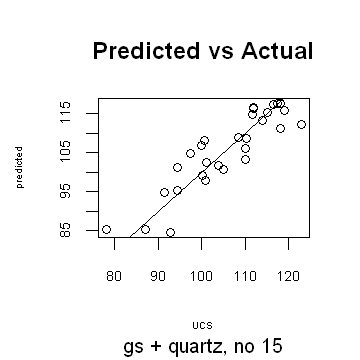

In [125]:
options(repr.plot.width=3, repr.plot.height=3)
plot(rocks[-15,]$UCS, LOOcv_gs_quartz_no15$cvpred, xlab = 'UCS', ylab = 'predicted', 
     main = 'Predicted vs Actual',
     sub = "gs + quartz, no 15",
    cex.lab = 0.5, cex.axis = 0.7)
abline(a = 0, b= 1) # add reference line for predicted = actual

For arguments sake, lets just assume there was a valid reason to exlcude Obs 15 and so our model choice is between the **PC1** + **PC3** no 15 model  and the **gs** + **quartz** no 15 model

In [126]:
#add the paramters for the gs + quartz' model to the model comparison data frame
gs_quartz <- c(summary(model_gs_quartz_no15)$r.squared, summary(model_gs_quartz_no15)$sigma, RMSD_gs_quartz_no15 )
model_comparison <- rbind(model_comparison, gs_quartz)
rownames(model_comparison)[5] <- "gs and quartz no 15"
#add removed all rejected models
model_comparison <- model_comparison[-c(1, 3, 4),]
model_comparison

,adj_r2,RSE,RMSD_all
PC1 +PC3 no 15,0.9000749,3.567057,3.822380
gs and quartz no 15,0.8357501,4.573255,4.801845


## Some Concluding Remarks

While the models built on the PCA analysis have better performance characteristics and only require 2 variables (**PC1** and **PC3**) in the model itself, they require the information on all 7 original variables to be known and complicate the interpretability of the model.

The **gs** + **quartz** model, while having lower performance characteristics may be preferable if understandability is a major factor. Also, if a business has to pay for the required information (in the form of purchasing data or getting testing done) it may also be a preferable option from a cost-benefit perspective to only require 2 instead of 7 variables to be known.
